<a href="https://colab.research.google.com/github/RNSHDeepika7/Assignments/blob/main/Recommendation_system_assgnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book.csv


In [3]:
!file -bi book.csv

text/csv; charset=iso-8859-1


In [4]:
!pip install chardet

In [5]:
import chardet

In [6]:
with open("book.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

In [107]:
import pandas as pd
df = pd.read_csv("book.csv", encoding=encoding)

In [108]:
df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


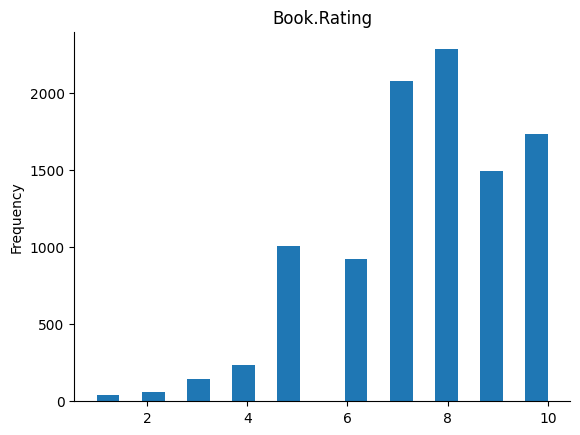

In [109]:
from matplotlib import pyplot as plt
df['Book.Rating'].plot(kind='hist', bins=20, title='Book.Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [110]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [111]:
new_df=df.rename(columns={'User.ID':'UserID','Book.Title':'Title','Book.Rating':'Rating'})

In [112]:
new_df.head()

,UserID,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [113]:
print('# of records: %d\n# of books: %d\n# of users: %d' % (len(new_df), len(new_df['Title'].unique()), len(new_df['UserID'].unique())))

# of records: 10000
# of books: 9659
# of users: 2182


In [114]:
import seaborn as sns
palette = sns.color_palette("RdBu", 10)

<ipython-input-115-5c6d0e66f0de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=new_df, palette=palette)


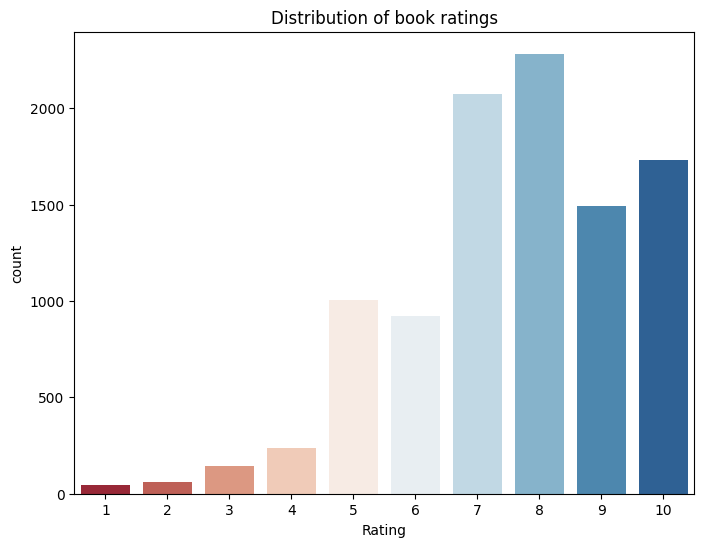

In [115]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Rating', data=new_df, palette=palette)
ax.set_title('Distribution of book ratings')

plt.show()

In [116]:
new_df['Rating'].unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [117]:
rating = pd.pivot_table(new_df, index='UserID', values='Rating', columns='Title', fill_value=0)


In [118]:
book_list=  list(rating)

In [119]:
book_titles =[]

In [120]:
for i in range(len(book_list)):
    book_titles.append(book_list[i])

In [121]:
book_titles

[' Jason, Madison &amp',
 ' Other Stories;Merril;1985;McClelland &amp',
 ' Repairing PC Drives &amp',
 "'48",
 "'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities",
 '...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR',
 '01-01-00: A Novel of the Millennium',
 '1,401 More Things That P*Ss Me Off',
 '10 Commandments Of Dating',
 '100 Great Fantasy Short, Short Stories',
 '1001 Brilliant Ways to Checkmate',
 '101 Bright Ideas: Esl Activities for All Ages',
 '101 Dalmatians',
 '101 Essential Tips: House Plants',
 '101 Telephone Jokes',
 '101 Wacky Computer Jokes',
 '101 Ways to Make Money at Home',
 '11 Edward Street',
 '11th Hour',
 '13 99 Euros',
 '14,000 Things to Be Happy About',
 '1984',
 '1st to Die: A Novel',
 '20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.',
 '20 Years of Censored News',
 '20,000 Leagues Under the Sea (Wordsworth Collection)',
 '20,001 Names for Baby',
 '2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 

In [122]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(rating)

indices = pd.Series(new_df.index, index=new_df['UserID']).drop_duplicates()

def get_recommendations(user, cosine_sim=cosine_sim):
    idx = indices[user]

    # Get the pairwsie similarity scores of all users with the input user
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the users based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar users
    sim_scores = sim_scores[1:11]

    # Get the user indices
    user_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar users
    return new_df['UserID'].iloc[user_indices]


In [127]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162994 sha256=e4058e24fdc67742fd5d1e7b324398e2099f8931750282c7ea4dac0bf3bc88c1
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [153]:
!pip install scikit-surprise

In [154]:
from surprise import SVD, Dataset, Reader

In [157]:
import numpy as np
book_titles = np.array(book_titles)

In [159]:
book_titles = book_titles.tolist()

In [173]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df[['UserID', 'Title', 'Rating']], reader)
trainset = data.build_full_trainset()
model = SVD()
model.fit(trainset)

def get_recommendations_cosine(user):
  sim_scores = list(enumerate(cosine_sim[user]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:11]
  user_indices = [i[0] for i in sim_scores]
  recommended_books = new_df['Title'].iloc[user_indices]
  return recommended_books

user = 100
print("Recommendations for user", user)
print("-" * 10)
recommended_books = get_recommendations_cosine(user)
for book in recommended_books:
  print(book)


Recommendations for user 100
----------
Classical Mythology
Clara Callan
Decision in Normandy
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It
The Mummies of Urumchi
The Kitchen God's Wife
What If?: The World's Foremost Military Historians Imagine What Might Have Been
PLEADING GUILTY
Under the Black Flag: The Romance and the Reality of Life Among the Pirates
Where You'll Find Me: And Other Stories
